In [7]:
import pandas as pd
import numpy as np
import requests as rq
import json
from pandas.api.types import CategoricalDtype

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()
%matplotlib inline

Loading BokehJS ...

In [11]:
data_set = pd.read_csv('./data/Womens Clothing E-Commerce Reviews.csv')
data_set = data_set.drop(data_set.columns[0], axis=1)

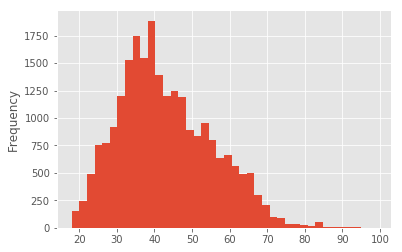

In [13]:
data_set['Age'].plot.hist(bins=40)

In [14]:
data_set['Age'].mean()

43.198543813335604

In [3]:
reviews = data_set['Review Text'].sample(n=100)

rr = reviews.values
rr = rr.tolist()
rr = list(map(lambda x: x if type(x) == str else "", rr))

a = [10*n for n in range(11)]

bb = [rr[a[n-1]:a[n]] for n, _ in enumerate(a)][1:]

for n in range(10):
    file = open('./Review/file%s.txt'%n, 'w')
    file.write("\n".join(bb[n]))
    file.close()

In [4]:
bins_age = pd.IntervalIndex.from_tuples([(0, 25), (25, 60), (60, 200)])
data_set['age_category'] = pd.cut(data_set.Age, bins_age)
data_set.age_category.cat.categories = ["jovens", "adultos", "terceira idade"]

In [5]:
bins_rating = pd.IntervalIndex.from_tuples([(0, 2), (2, 4), (4, 10)])
data_set['rating_category'] = pd.cut(data_set.Rating, bins_rating)
data_set.rating_category.cat.categories = ["muito ruim", "razoável", "boa"]

In [11]:
division_name = data_set['Division Name']
division_name.unique()

array(['General', 'General Petite', 'Initmates'], dtype=object)

In [12]:
departament_name = data_set['Department Name']
departament_name.unique()

array(['Jackets', 'Dresses', 'Intimate', 'Bottoms', 'Tops'], dtype=object)

In [13]:
class_name = data_set['Class Name']
class_name.unique()

array(['Jackets', 'Dresses', 'Sleep', 'Pants', 'Knits', 'Fine gauge',
       'Blouses', 'Legwear', 'Skirts', 'Swim', 'Jeans', 'Sweaters',
       'Lounge', 'Layering', 'Outerwear'], dtype=object)

In [14]:
# print(data_set.isnull().sum())
# data_set = data_set.dropna(subset=['Review Text'])
# data_set = data_set.sample(n=100)
# data_set.to_csv('./data/only100.csv', index=False)

In [15]:
# !pip install requests 

In [16]:
def analyze(text):
    payload = {'text': text}
    headers = {'content-type': 'application/json'}

    gl = rq.post('http://localhost:3000/analyze', json=payload, headers=headers)
    return gl.content

In [31]:
# data_set["result"] = data_set['Review Text'].apply(lambda x: analyze(x))

In [20]:
# aa = data_set['result'].apply(lambda x: json.loads(x)['entities'])

In [57]:
# bb = aa.values.tolist()[2]

In [21]:
def bemMalNone(cases, cat='PRODUCT'):
    bem = list(filter(lambda x: x['disambiguation']['subtype'][0] == 'BEM', cases))
    mal = list(filter(lambda x: x['disambiguation']['subtype'][0] == 'MAL', cases))
    if len(bem) == 0 and len(mal) == 0:
        return (cat,'NONE')
    if len(bem) > len(mal):
        return (cat,'BEM')
    return (cat,'MAL')

def classify(res):
    prod = list(filter(lambda x: x['type'] == 'PRODUCT', res))
    comp = list(filter(lambda x: x['type'] == 'COMPANY', res))
    if len(prod) == 0 and len(comp) == 0:
        return ('NONE', 'NONE')
    if len(prod) > len(comp):
        return bemMalNone(prod, 'PRODUCT')
    return bemMalNone(comp, 'COMPANY')


In [33]:
# data_set['classify'] = aa.apply(lambda x: classify(x))

In [34]:
# data_set['tipo'] = data_set['classify'].apply(lambda x: x[0])
# data_set['sentimento'] = data_set['classify'].apply(lambda x: x[1])
# data_set

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_category,rating_category,result,classify,tipo,sentimento
10215,936,49,A signature piece,Absolutely beautiful jacket...the craftsmanshi...,5,1,1,General,Tops,Sweaters,adultos,boa,"b'{""usage"":{""text_units"":1,""text_characters"":5...","(PRODUCT, MAL)",PRODUCT,MAL
1383,1083,34,Very cute everyday dress,The retailer store by me only carried these in...,4,1,8,General Petite,Dresses,Dresses,adultos,razoável,"b'{""usage"":{""text_units"":1,""text_characters"":4...","(PRODUCT, BEM)",PRODUCT,BEM
11139,862,38,Cute tunic with interesting neckline,Super soft and colors are great. i got the nav...,4,1,1,General,Tops,Knits,adultos,razoável,"b'{""usage"":{""text_units"":1,""text_characters"":1...","(PRODUCT, BEM)",PRODUCT,BEM
16180,940,34,Ivory was odd color,"This sweater is really cute, great fit and uni...",3,0,2,General Petite,Tops,Sweaters,adultos,razoável,"b'{""usage"":{""text_units"":1,""text_characters"":1...","(COMPANY, NONE)",COMPANY,NONE
18203,1009,39,Very whimsical,I tried on the xs in store i typically need pe...,4,1,1,General,Bottoms,Skirts,adultos,razoável,"b'{""usage"":{""text_units"":1,""text_characters"":4...","(PRODUCT, BEM)",PRODUCT,BEM
22370,1072,32,Adorable,Love this dress! perfect length and i love the...,5,1,1,General,Dresses,Dresses,adultos,boa,"b'{""usage"":{""text_units"":1,""text_characters"":1...","(PRODUCT, BEM)",PRODUCT,BEM
7570,829,27,"Sweet design, but too short to wear around",I liked the quality of the top and the design....,3,0,0,General,Tops,Blouses,adultos,razoável,"b'{""usage"":{""text_units"":1,""text_characters"":1...","(COMPANY, NONE)",COMPANY,NONE
9518,1094,59,Amazing!,"This dress is amazing! it fits true to size, v...",5,1,0,General,Dresses,Dresses,adultos,boa,"b'{""usage"":{""text_units"":1,""text_characters"":3...","(PRODUCT, BEM)",PRODUCT,BEM
11478,868,29,NaN,Nice stretchy shirt. nothing special so i woul...,4,1,1,General,Tops,Knits,adultos,razoável,"b'{""usage"":{""text_units"":1,""text_characters"":7...","(PRODUCT, MAL)",PRODUCT,MAL
9422,1094,35,Love!,"Retailer, take me away! this dress transports ...",4,1,1,General Petite,Dresses,Dresses,adultos,razoável,"b'{""usage"":{""text_units"":1,""text_characters"":5...","(PRODUCT, BEM)",PRODUCT,BEM


In [22]:
data_set = pd.read_csv('./data/only100.csv')
data_set

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
age_category               object
rating_category            object
result                     object
classify                   object
tipo                       object
sentimento                 object
dtype: object

In [6]:
!pip install matplotlib bokeh 

    100% |████████████████████████████████| 14.1MB 1.6MB/s ta 0:00:01
    100% |████████████████████████████████| 16.1MB 900kB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 2.3MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 2.1MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/9e/a3/1d13970c3f36777c583f136c136f804d70f500168edc1edea6daa7200769/PyYAML-3.13.tar.gz
    100% |████████████████████████████████| 3.6MB 1.9MB/s ta 0:00:01
  Running setup.py install for PyYAML ... done
  Running setup.py install for bokeh ... done
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:

data_set['Division Name'] = data_set['Division Name'].astype('category')
data_set['Department Name'] = data_set['Department Name'].astype('category')
data_set['Class Name'] = data_set['Class Name'].astype('category')
data_set['Rating'] = data_set['Rating'].astype('category')
data_set['Recommended IND'] = data_set['Recommended IND'].astype('bool')
data_set['tipo'] = data_set['tipo'].astype('category')
data_set['sentimento'] = data_set['sentimento'].astype('category')
data_set['age_category'] = data_set['age_category'].astype(CategoricalDtype(categories=["jovens", "adultos", "terceira idade"], ordered=True))
data_set['rating_category'] = data_set['rating_category'].astype(CategoricalDtype(categories=["muito ruim", "razoável", "boa"], ordered=True))


In [14]:
data_set.dtypes

Clothing ID                   int64
Age                           int64
Title                        object
Review Text                  object
Rating                     category
Recommended IND                bool
Positive Feedback Count       int64
Division Name              category
Department Name            category
Class Name                 category
age_category               category
rating_category            category
result                       object
classify                     object
tipo                       category
sentimento                 category
dtype: object

In [4]:
data_set.drop(columns=['result', 'classify'], inplace=True)
data_set

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_category,rating_category,tipo,sentimento
0,936,49,A signature piece,Absolutely beautiful jacket...the craftsmanshi...,5,True,1,General,Tops,Sweaters,adultos,boa,PRODUCT,MAL
1,1083,34,Very cute everyday dress,The retailer store by me only carried these in...,4,True,8,General Petite,Dresses,Dresses,adultos,razoável,PRODUCT,BEM
2,862,38,Cute tunic with interesting neckline,Super soft and colors are great. i got the nav...,4,True,1,General,Tops,Knits,adultos,razoável,PRODUCT,BEM
3,940,34,Ivory was odd color,"This sweater is really cute, great fit and uni...",3,False,2,General Petite,Tops,Sweaters,adultos,razoável,COMPANY,NONE
4,1009,39,Very whimsical,I tried on the xs in store i typically need pe...,4,True,1,General,Bottoms,Skirts,adultos,razoável,PRODUCT,BEM
5,1072,32,Adorable,Love this dress! perfect length and i love the...,5,True,1,General,Dresses,Dresses,adultos,boa,PRODUCT,BEM
6,829,27,"Sweet design, but too short to wear around",I liked the quality of the top and the design....,3,False,0,General,Tops,Blouses,adultos,razoável,COMPANY,NONE
7,1094,59,Amazing!,"This dress is amazing! it fits true to size, v...",5,True,0,General,Dresses,Dresses,adultos,boa,PRODUCT,BEM
8,868,29,NaN,Nice stretchy shirt. nothing special so i woul...,4,True,1,General,Tops,Knits,adultos,razoável,PRODUCT,MAL
9,1094,35,Love!,"Retailer, take me away! this dress transports ...",4,True,1,General Petite,Dresses,Dresses,adultos,razoável,PRODUCT,BEM


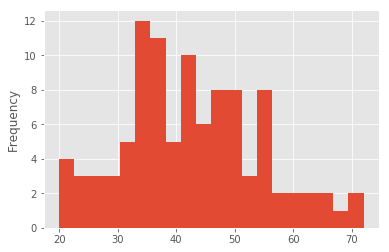

In [10]:
data_set['Age'].plot.hist(bins=20)